In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
housing = pd.read_csv('../data/interim/housing_data.csv')

housing.head()

,Unnamed: 0,OBJECTID,NEIGH_NO,Neighborhood_Name,Neighborhood_Type,Neighborhood_Subtype,ACS_Vinatage,Occupied_Housing_Units,Owner_Households,Renter_Households,...,"Owner_Costs_Less_Than_$1,000","Owner_Costs_$1,000-$1,499","Owner_Costs_$1,500-$1,999","Owner_Costs_$2,000-$2,499","Owner_Costs_$2,500-$2,999","Owner_Costs_$3,000-$3,499","Owner_Costs_$3,500-$3,999","Owner_Costs_$4,000_or_more",Owner_housing_units_without_a_mortgage,Neighborhood_Type_(outside_comp_plan_areas_id)
0,0,1,1.0,Council District 1,CD,NaN,5Y23,48209,27781,20428,...,225,700,2397,2529,3747,3651,2926,5002,6604,CD
1,1,2,2.0,Council District 2,CD,NaN,5Y23,43824,21520,22304,...,212,370,1700,2311,2311,2511,1916,3241,6948,CD
2,2,3,3.0,Council District 3,CD,NaN,5Y23,60156,20642,39514,...,335,293,867,1469,1765,1845,1620,6162,6286,CD
3,3,4,4.0,Council District 4,CD,NaN,5Y23,42569,18939,23630,...,67,252,721,1165,1544,1936,1205,5887,6162,CD
4,4,5,5.0,Council District 5,CD,NaN,5Y23,47887,23856,24031,...,130,501,1419,2661,3083,2561,1726,4846,6929,CD


In [40]:
print(housing.columns)
cols = ['Gross_Rent_as_a_Percentage_of_Household_Income_Less_than_15.0%','Gross_Rent_as_a_Percentage_of_Household_Income_15.0_to_19.9%','Gross_Rent_as_a_Percentage_of_Household_Income_20.0_to_24.9%', 'Gross_Rent_as_a_Percentage_of_Household_Income_25.0_to_29.9%']
test = housing[cols]
housing['Total_under_35'] = np.sum(test[cols],axis=1)

housing["Ratio_Under_35"] = housing["Total_under_35"]/housing["Renter_Households"]

housing[['Neighborhood_Name','Total_under_35','Ratio_Under_35']]

Index(['Unnamed: 0', 'OBJECTID', 'NEIGH_NO', 'Neighborhood_Name',
       'Neighborhood_Type', 'Neighborhood_Subtype', 'ACS_Vinatage',
       'Occupied_Housing_Units', 'Owner_Households', 'Renter_Households',
       'Gross_Rent_as_a_Percentage_of_Household_Income_Less_than_15.0%',
       'Gross_Rent_as_a_Percentage_of_Household_Income_15.0_to_19.9%',
       'Gross_Rent_as_a_Percentage_of_Household_Income_20.0_to_24.9%',
       'Gross_Rent_as_a_Percentage_of_Household_Income_25.0_to_29.9%',
       'Gross_Rent_as_a_Percentage_of_Household_Income_30.0_to_34.9%',
       'Gross_Rent_as_a_Percentage_of_Household_Income_35.0%_or_more',
       'Gross_Rent_30%_or_more_of_Household_Income',
       'Gross_Rent_as_a_Percentage_of_Household_Income_Not_Computed',
       'Owner_housing_units_with_a_mortgage_where_selected_monthly_onwer_costs_as_a_percentage_of_household_income_can_be_computed',
       'Selected_Monthly_Owner_Costs_as_a_Percentage_of_Household_Income_Less_than_20.0%',
       'Selected_

,Neighborhood_Name,Total_under_35,Ratio_Under_35
0,Council District 1,10066,0.492755
1,Council District 2,10574,0.474085
2,Council District 3,21495,0.543984
3,Council District 4,10347,0.437876
4,Council District 5,11376,0.473389
...,...,...,...
87,University District,2679,0.286493
88,Uptown,4310,0.625181
89,Downtown,13034,0.590094
90,First Hill/Capitol Hill,15069,0.539837


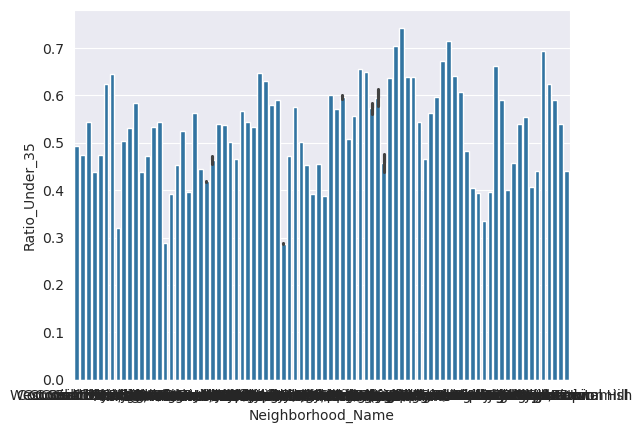

In [41]:
sns.barplot(data=housing, x='Neighborhood_Name', y='Ratio_Under_35')

plt.show()

Im glad to see that the percentage of people who have affordable rent varies greatly by neighborhood. I hate the way this bar chart looks though. I need to get the dashboard up and running quick.

In [43]:
out = housing[['Neighborhood_Name','Total_under_35','Ratio_Under_35']]
out.to_csv('../data/processed/Under35.csv', index=False)